In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
sns.set( style="ticks" )

In [86]:
df_train = pd.read_csv("data/3_training_set_day2.csv", index_col=0)
df_test = pd.read_csv("data/4_testing_set_day2.csv", index_col=0)

train_x = df_train.drop(columns=['PRED_1', 'PRED_2'])
train_y = df_train[['PRED_1', 'PRED_2']]

test_x = df_test.drop(columns=['PRED_1', 'PRED_2'])
test_y = df_test[['PRED_1', 'PRED_2']]

In [87]:
pred = np.loadtxt("results/7_lstm_day2.csv", delimiter=',')

In [88]:
print(pred[:,0])

[154.36525187 155.92501934 156.41494016 154.06552594 153.55548307
 154.77516882 155.42509657 156.70491291 156.56495099 154.56528705
 153.57542886 153.5554667  154.0153508  153.61542799 153.13554679
 151.78577468 152.4757122  152.91550396]


MSE: 0.06203087805774383
MAE: 0.047247026387892015


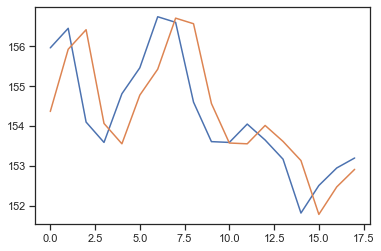

In [89]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

l = len(pred)
x = np.arange(0, l)

y_true = []
y_pred = []

for idx in range( l ):
  y_true.append( test_y.iloc[idx][0] )
  #y_pred.append( clf.predict( test_x.iloc[idx].values.reshape(1, -1))[0] )
  y_pred = pred[:,0]
  

fig, ax = plt.subplots()
sns.lineplot(x=x, y=y_true, ax=ax)
sns.lineplot(x=x, y=y_pred, ax=ax)

print(f"MSE: {mean_squared_error(y_true, y_pred) / len(y_true)}") 
print(f"MAE: {mean_absolute_error(y_true, y_pred) / len(y_true)}") 

MSE: 0.1454673779233582
MAE: 0.07891869723757797


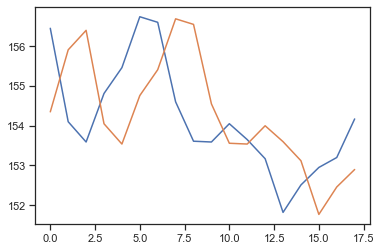

In [90]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

l = len(pred)
x = np.arange(0, l)

y_true = []
y_pred = []

for idx in range( l ):
  y_true.append( test_y.iloc[idx][1] )
  #y_pred.append( clf.predict( test_x.iloc[idx].values.reshape(1, -1))[0] )
  y_pred = pred[:,1]
  

fig, ax = plt.subplots()
sns.lineplot(x=x, y=y_true, ax=ax)
sns.lineplot(x=x, y=y_pred, ax=ax)

print(f"MSE: {mean_squared_error(y_true, y_pred) / len(y_true)}") 
print(f"MAE: {mean_absolute_error(y_true, y_pred) / len(y_true)}") 

MSE: 0.1111111111111111
MAE: 0.05555555555555555


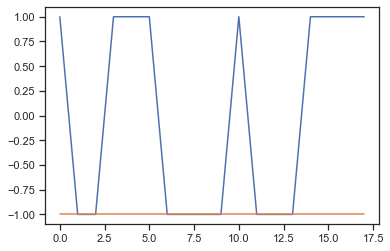

In [91]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

l = len(pred)
x = np.arange(0, l)

y_true = []
y_pred = []

for idx in range( l ):
  y_true.append( test_y.iloc[idx][1] - test_y.iloc[idx][0] )
  #y_pred.append( clf.predict( test_x.iloc[idx].values.reshape(1, -1))[0] )
  y_pred = pred[:,1] - pred[:,0]
  
for i in range(len(y_true)):
  if y_true[i] > 0:
    y_true[i] = 1
  else:
    y_true[i] = -1

  if y_pred[i] > 0:
    y_pred[i] = 1
  else:
    y_pred[i] = -1

fig, ax = plt.subplots()
sns.lineplot(x=x, y=y_true, ax=ax)
sns.lineplot(x=x, y=y_pred, ax=ax)

print(f"MSE: {mean_squared_error(y_true, y_pred) / len(y_true)}") 
print(f"MAE: {mean_absolute_error(y_true, y_pred) / len(y_true)}") 